In [2]:
# [1] 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# [2] 데이터 준비
file_name = 'titanic.csv'

In [4]:
tDF=pd.read_csv(file_name)
tDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# 결측치 확인
tDF.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# 생존자만 데이터 뽑기
tDF=tDF[tDF['survived'] ==1]

In [7]:
gender_tDF=tDF['sex'].replace({'male':1,'female':2})
gender_tDF

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_16528\1054926902.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_tDF=tDF['sex'].replace({'male':1,'female':2})


1      2
2      2
3      2
8      2
9      2
      ..
875    2
879    2
880    2
887    2
889    1
Name: sex, Length: 342, dtype: int64

In [50]:
g_df1=gender_tDF.value_counts()
g_df1

sex
2    233
1    109
Name: count, dtype: int64

In [9]:
g_df1.index=['여자','남자']
g_df1

남자    233
여자    109
Name: count, dtype: int64

In [10]:
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
FONT_FILE=r'C:\Windows\Fonts\MalangmalangR.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

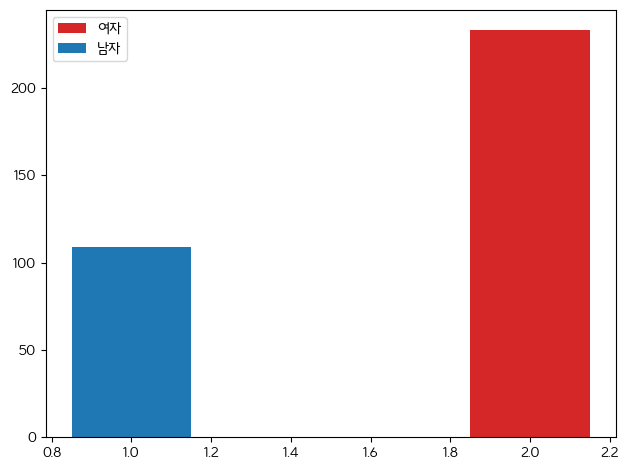

In [51]:
bar_labels = ['여자', '남자']
bar_colors = ['tab:red', 'tab:blue']
plt.bar(g_df1.index,g_df1.values,width=0.3,
        label=bar_labels,color=bar_colors,
        )
plt.tight_layout()

plt.legend()

plt.show()

In [12]:
gender_ageDF=tDF.loc[:,['sex','age']]
gender_ageDF

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0
...,...,...
875,female,15.0
879,female,56.0
880,female,25.0
887,female,19.0


In [13]:
# 성별을 1,2로 표시한 테이블 추가

tDF['gender']=gender_tDF
tDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,2
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True,2
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,2
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,2


In [14]:
a_gdf=tDF[['age','gender']]
a_gdf

,age,gender
1,38.0,2
2,26.0,2
3,35.0,2
8,27.0,2
9,14.0,2
...,...,...
875,15.0,2
879,56.0,2
880,25.0,2
887,19.0,2


In [15]:
# 결측치 확인
a_gdf.isna().sum()

age       52
gender     0
dtype: int64

In [16]:
a_gdf=a_gdf.dropna()

In [17]:
a_gdf.isna().sum()

age       0
gender    0
dtype: int64

In [18]:
# describe로 데이터 수치 확인
a_gdf.describe()

,age,gender
count,290.000000,290.000000
mean,28.343690,1.679310
std,14.950952,0.467548
min,0.420000,1.000000
25%,19.000000,1.000000
50%,28.000000,2.000000
75%,36.000000,2.000000
max,80.000000,2.000000


In [19]:
# 10세 미만인 아기들 제외시켜주기
age_idx= ~ ((a_gdf['age']>0) & (a_gdf['age']<10))
a_gdf=a_gdf[age_idx]
a_gdf

,age,gender
1,38.0,2
2,26.0,2
3,35.0,2
8,27.0,2
9,14.0,2
...,...,...
875,15.0,2
879,56.0,2
880,25.0,2
887,19.0,2


In [20]:
# describe로 데이터 수치 확인
a_gdf.describe()

,age,gender
count,252.000000,252.000000
mean,32.093254,1.706349
std,12.195790,0.456340
min,11.000000,1.000000
25%,23.000000,1.000000
50%,30.000000,2.000000
75%,39.000000,2.000000
max,80.000000,2.000000


In [21]:
# age를 int형으로 변환
a_gdf1=a_gdf['age'].astype(int)
a_gdf1

1      38
2      26
3      35
8      27
9      14
       ..
875    15
879    56
880    25
887    19
889    26
Name: age, Length: 252, dtype: int32

In [22]:
# cut함수로 데이터 묶기
a_gdf2=pd.cut(a_gdf1,bins=[10,20,30,40,50,60,70,80,90],labels=['10대','20대','30대','40대','50대','60대','70대','70대 이상'],right=False)

In [23]:
new_gender_ageDF=pd.concat([a_gdf['gender'],a_gdf2],axis=1)
new_gender_ageDF

,gender,age
1,2,30대
2,2,20대
3,2,30대
8,2,20대
9,2,10대
...,...,...
875,2,10대
879,2,50대
880,2,20대
887,2,10대


In [24]:
# 인덱스 age로 설정하고 인덱스 내림차순 정렬
new_gender_ageDF=new_gender_ageDF.set_index('age')
new_gender_ageDF=new_gender_ageDF.sort_index()
new_gender_ageDF.tail()

## 마지막 확인 결과 80세 남자 한명밖에 없음.

,gender
age,
60대,1
60대,2
60대,1
60대,2
70대 이상,1


In [25]:
# 10대 여자 숫자
ten_girl_idx=new_gender_ageDF.loc['10대'][:] == 2
ten_girl_idx.sum() # 45
ten_boy_idx=new_gender_ageDF.loc['10대'][:] == 1
ten_boy_idx.sum() # 57

gender    7
dtype: int64

In [26]:
def w_gender_count(range):
    ten_girl_idx=new_gender_ageDF.loc[range][:] == 2
    woman=ten_girl_idx.sum() # 45
    woman.to_list()
    # ten_boy_idx=new_gender_ageDF.loc[range][:] == 1
    # man=ten_boy_idx.sum() # 57
    # man.to_list()
    return woman

def m_gender_count(range):
    ten_boy_idx=new_gender_ageDF.loc[range][:] == 1
    man=ten_boy_idx.sum() # 57
    man.to_list()
    return man

In [27]:
w_data=pd.DataFrame([w_gender_count('10대'),w_gender_count('20대'),w_gender_count('30대'),w_gender_count('40대'),
             w_gender_count('50대'),w_gender_count('60대')],
             index=['10대','20대','30대','40대','50대','60대'])
w_data.loc['70대 이상'] = 0
w_data.columns
w_data=w_data.rename(columns={'gender':'여'})


In [28]:
m_data=pd.DataFrame([m_gender_count('10대'),m_gender_count('20대'),m_gender_count('30대'),m_gender_count('40대'),
             m_gender_count('50대'),m_gender_count('60대')],
             index=['10대','20대','30대','40대','50대','60대'])
m_data.loc['70대 이상'] = 1
m_data=m_data.rename(columns={'gender':'남'})

In [29]:
# final_result=pd.concat([m_data,w_data],axis=1)

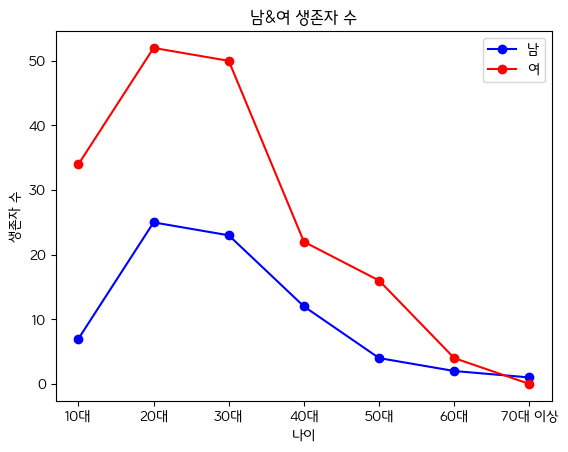

In [30]:
plt.plot(m_data,'bo-',label='남')
plt.plot(w_data,'ro-',label='여')
plt.legend()
plt.title("남&여 생존자 수")
plt.xlabel('나이')
plt.ylabel('생존자 수')
plt.show()

## [ 시도별 전출입 인구수 ]

In [31]:
# 데이터 준비
file_name='시도별 전출입 인구수.xlsx'
dataDF=pd.read_excel(file_name)
dataDF.isna().sum() != 0


전출지별     True
전입지별     True
1970    False
1971    False
1972    False
1973    False
1974    False
1975    False
1976    False
1977    False
1978    False
1979    False
1980    False
1981    False
1982    False
1983    False
1984     True
1985     True
1986     True
1987    False
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
dtype: bool

In [32]:
dataDF=dataDF.ffill()

In [33]:
dataDF.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [34]:
dataDF=dataDF.set_index(['전출지별','전입지별'])

In [35]:
Daegu_data=dataDF.loc['대구광역시']
Daegu_data

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,-,-,-,-,-,-,-,-,-,-,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,-,-,-,-,-,-,-,-,-,-,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,-,-,-,-,-,-,-,-,-,-,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,-,-,-,-,-,-,-,-,-,-,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,-,-,-,-,-,-,-,-,-,-,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,-,-,-,-,-,-,-,-,-,-,...,563,624,527,577,711,622,902,629,547,515
대전광역시,-,-,-,-,-,-,-,-,-,-,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,-,-,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827


In [36]:
len(Daegu_data.index)
# 1980년도까지는 모두 자료 없음이기 때문에 해당 열 삭제

18

In [37]:
# '-' 값 가지는 행 확인
Daegu_data.isin(['-']).sum()

1970    18
1971    18
1972    18
1973    18
1974    18
1975    18
1976    18
1977    18
1978    18
1979    18
1980    18
1981     4
1982     2
1983     2
1984     2
1985     2
1986     2
1987     2
1988     2
1989     2
1990     2
1991     2
1992     2
1993     2
1994     2
1995     2
1996     1
1997     1
1998     1
1999     1
2000     1
2001     1
2002     1
2003     1
2004     1
2005     1
2006     1
2007     1
2008     1
2009     1
2010     1
2011     1
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
dtype: int64

In [38]:
# 년도별? 도시별? 전출입 기록??
# 지금 도출해야할 결과는 대구 ==> 타지역으로 이동 인구수 분석 및 시각화
# 가로축에 년도 나와야되고 세로축에 인구 이동 수, 그래프는 도시 이름


In [39]:
Daegu_data=Daegu_data.drop(columns=Daegu_data.loc[:][['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980']])
Daegu_data

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,481534,521117,582412,525143,518560,513581,570103,558115,517090,528024,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,19760,23725,32205,28897,25736,21724,20130,22080,21201,19521,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,10590,10732,10512,10804,10696,10114,10496,10019,8789,8848,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,348566,393803,438255,390862,384972,383388,429854,417433,387612,387458,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,1440,1640,1921,1927,2036,1922,2074,1927,2272,2438,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,-,0,0,0,0,517,529,629,704,620,...,563,624,527,577,711,622,902,629,547,515
대전광역시,-,0,0,0,0,0,0,0,2014,2169,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,-,-,-,-,-,-,-,-,-,-,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,261,233,526,879,642,827


In [40]:
# 통계를 위해 -을 0으로 바꿔줌
Daegu_data=Daegu_data.replace('-',0)

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_16528\2689226402.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Daegu_data=Daegu_data.replace('-',0)


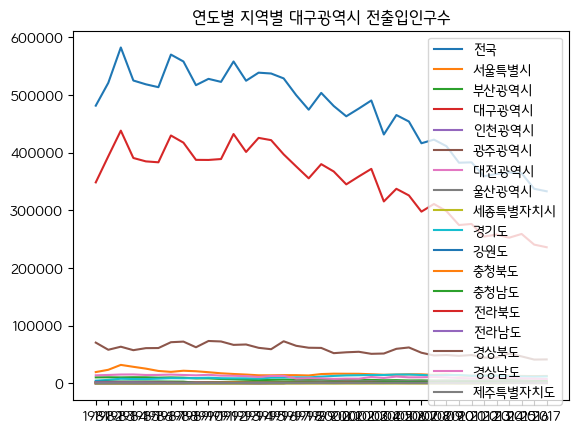

In [41]:
index=['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도']
for i in index:
       local_data=Daegu_data.loc[i]
       plt.plot(local_data,label=i)
       plt.title(f'연도별 지역별 대구광역시 전출입인구수')
       plt.legend()
       plt.xlabel='년도'
       plt.ylabel='이동 인구수'

plt.show()


In [42]:
D2S=Daegu_data.loc['서울특별시']

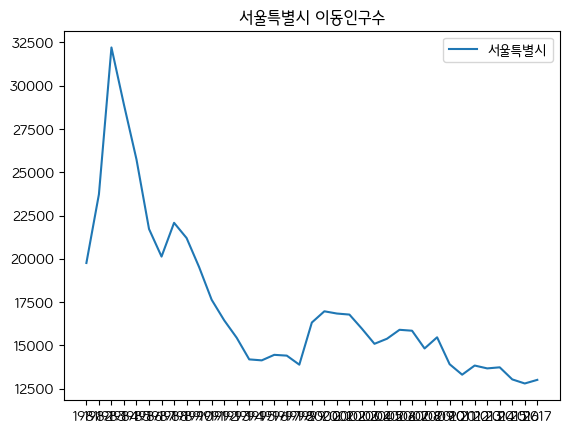

In [43]:
plt.plot(D2S,label='서울특별시')
plt.title(f'서울특별시 이동인구수')
plt.legend()
plt.xlabel='년도'
plt.ylabel='이동 인구수'

In [44]:
B2S=Daegu_data.loc['부산광역시']

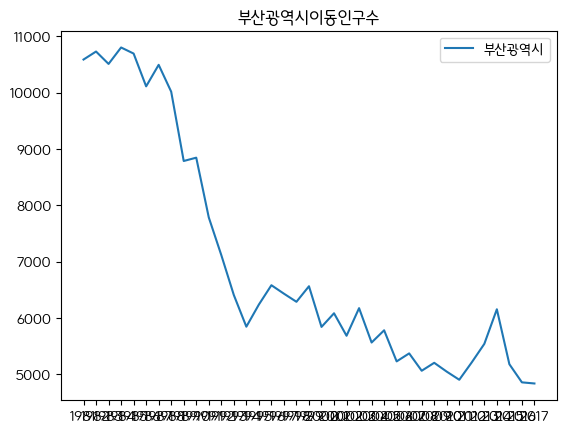

In [45]:
plt.plot(B2S,label='부산광역시')
plt.title(f'부산광역시이동인구수')
plt.legend()
plt.xlabel='년도'
plt.ylabel='이동 인구수'

In [46]:
Daegu_data.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지별')

In [47]:
index=['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도']
for i in index:
    Daegu_data.loc[i]
    

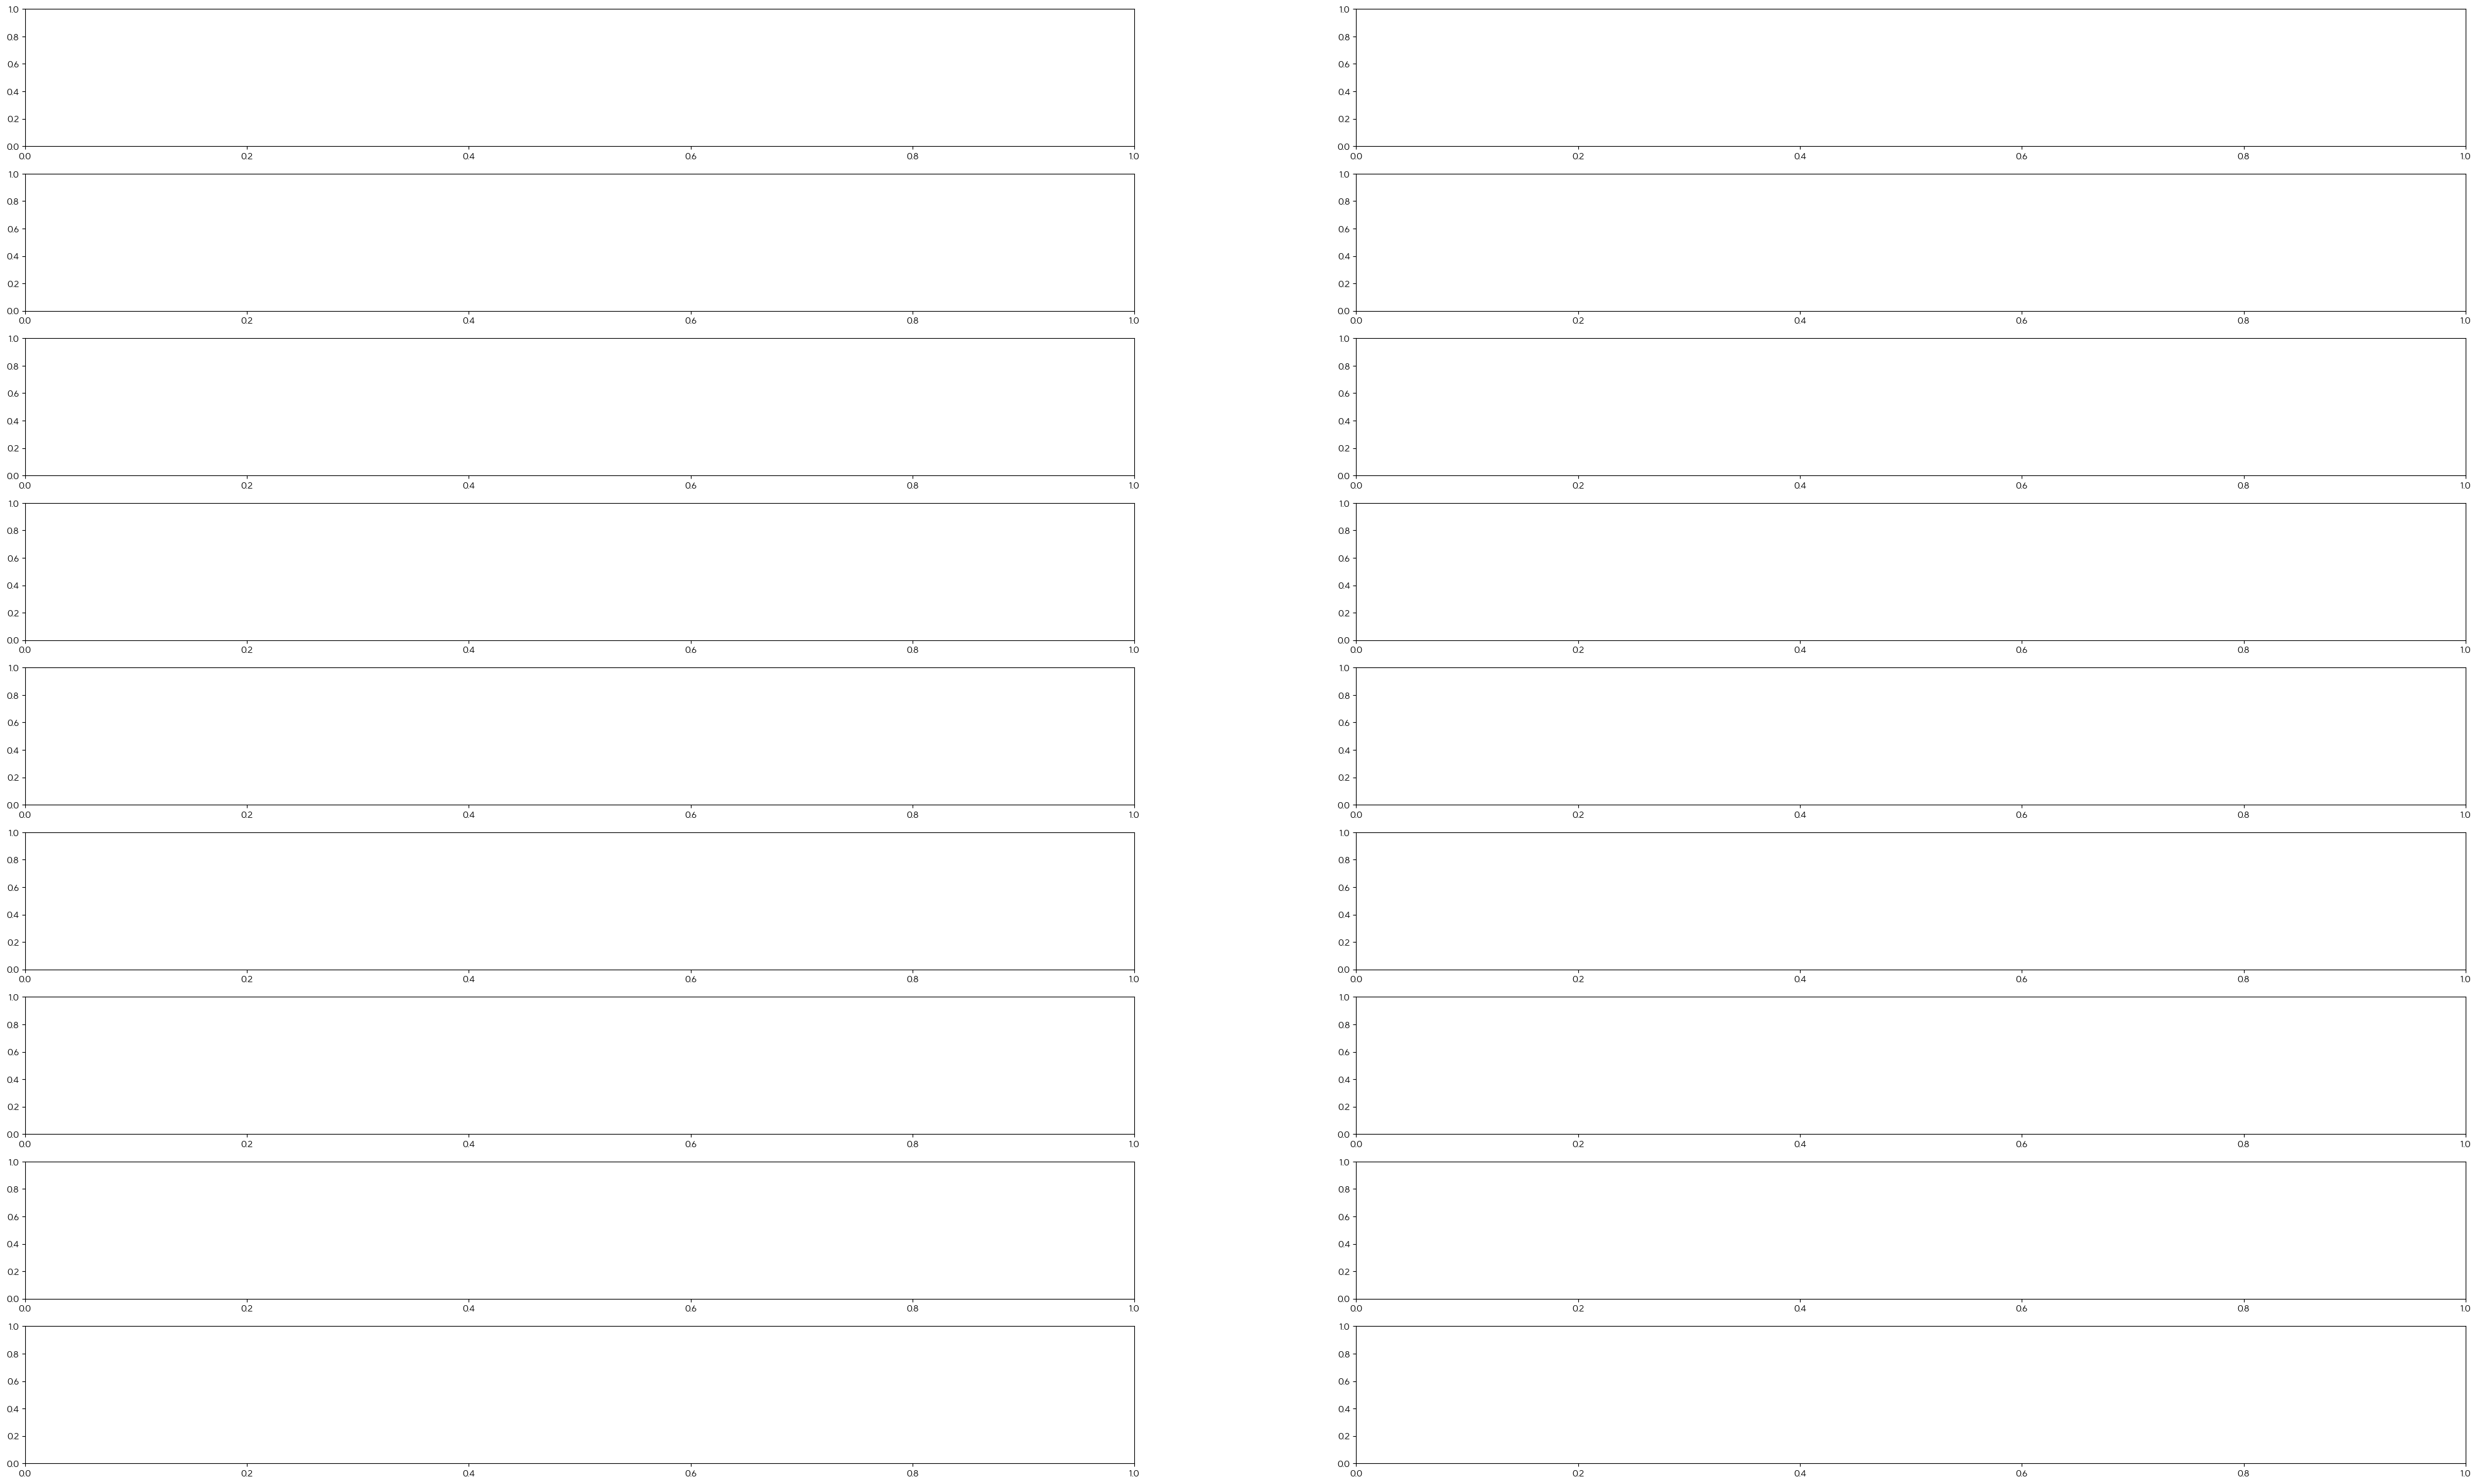

In [48]:
fig=plt.figure(figsize=(50,30))
axes=fig.subplots(9,2)